Exploratory Data Analysis

Content:

Section 01. Exploring of dataset as a wole and each individual variable: with intermediate conclusions

Section 02. Exploring the relationship between each variable and the target: with intermediate conclusions

Section 03. Assessing interactions between variables - TBD

Section 04. Exploring data across many dimensions - TBD

In [91]:
# Import necessary libraries
import sqlite3
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  

pd.set_option('display.max_column', None)
pd.plotting.register_matplotlib_converters()

print("Setup Complete")

Setup Complete


In [92]:
# Path of the file to read
train_filepath = "train.csv"

# Read the file into a variable
train_data = pd.read_csv(train_filepath)

Section 01. Exploring of dataset as a wole and each individual variable

In [93]:
print("first 5 rows of the dataset: ")
train_data.head()

first 5 rows of the dataset: 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [94]:
print("statistical summary of the dataset: ")
train_data.describe()

statistical summary of the dataset: 


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [95]:
print("Dataset statistics: The number of variables in the dataset: ")
print(train_data.shape[1])

print("Dataset statistics: Number of observations: ")
print(train_data.shape[0])

print("Dataset statistics: Missing cells: ")
print(train_data.isnull().sum().sum())

print("Dataset statistics: Missing cells (%): ")
print(round(train_data.isnull().sum().sum()*100/(train_data.shape[0]*train_data.shape[1]),2))

print("Dataset statistics: Duplicate rows: ")
print(train_data[train_data.duplicated()].shape[0])

print("Dataset statistics: Duplicate rows (%): ")
print(round(train_data[train_data.duplicated()].shape[0]*100/train_data.shape[0],1))

print("Dataset statistics: Total size in memory, MB: ")
print(train_data.memory_usage().sum()/1000000)

print("Dataset statistics: Average record size in memory, B: ")
print(train_data.memory_usage().sum()/train_data.shape[0])


Dataset statistics: The number of variables in the dataset: 
12
Dataset statistics: Number of observations: 
100000
Dataset statistics: Missing cells: 
76165
Dataset statistics: Missing cells (%): 
6.35
Dataset statistics: Duplicate rows: 
0
Dataset statistics: Duplicate rows (%): 
0.0
Dataset statistics: Total size in memory, MB: 
9.600128
Dataset statistics: Average record size in memory, B: 
96.00128


In [96]:
# replace all NA's with 0
train_data.fillna(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,0.00,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,0.00,0,0,27323,13.35,0,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,0,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,0,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,0,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,0,9.95,0,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,0,S


In [97]:
print("Variable Surevived description: values type")
print(train_data['Survived'].dtype.name)
print("Variable Surevived description: the number of unique values")
train_data['Survived'].nunique()  

Variable Surevived description: values type
int64
Variable Surevived description: the number of unique values


2

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Survived'>

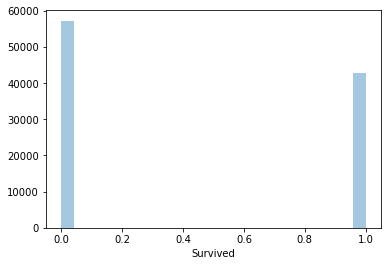

In [98]:
# Histogram 
sns.distplot(a=train_data['Survived'], kde=False)

Conclusion: Variable Survived is a categorical numerical variable which can take two values. Survived is a target. There are more not survived people in the dataset.

In [99]:
print("Variable Pclass description: values type")
print(train_data['Pclass'].dtype.name)
print("Variable Pclass description: the number of unique values")
train_data['Pclass'].nunique()  

Variable Pclass description: values type
int64
Variable Pclass description: the number of unique values


3

<AxesSubplot:xlabel='Pclass'>

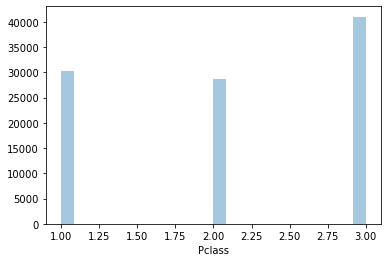

In [100]:
# Histogram 
sns.distplot(a=train_data['Pclass'], kde=False)

Conclusion: Variable Pclass is a categorical numerical variable which can take three values.

In [101]:
print("Variable Name description: values type")
print(train_data['Name'].dtype.name)
print("Variable Name description: the number of unique values")
train_data['Name'].nunique() 

Variable Name description: values type
object
Variable Name description: the number of unique values


92144

Conclusion: Variable Name is not a categorical variable. Object type means most probably a string, also obvious from the context.

In [102]:
print("Variable Sex description: values type")
print(train_data['Sex'].dtype.name)
print("Variable Sex description: the number of unique values")
train_data['Sex'].nunique() 

Variable Sex description: values type
object
Variable Sex description: the number of unique values


2

Conclusion: Variable Sex is a categorical object (most probably string) variable which can take two values.

In [103]:
print("Variable Age description: values type")
print(train_data['Age'].dtype.name)
print("Variable Age description: the number of unique values")
train_data['Age'].nunique() 

Variable Age description: values type
float64
Variable Age description: the number of unique values


173

<AxesSubplot:xlabel='Age'>

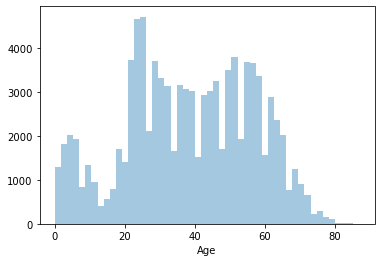

In [104]:
# Histogram 
sns.distplot(a=train_data['Age'], kde=False)

Conclusion: Variable Age is not categorical numerical variable. Please see also above the histogram for the variable Age: pasengers age is between: 0 - 80, pasengers between 22-25 years are the most presented in the dataset.

In [105]:
print("Variable SibSp description: values type")
print(train_data['SibSp'].dtype.name)
print("Variable SibSp description: the number of unique values")
train_data['SibSp'].nunique() 

Variable SibSp description: values type
int64
Variable SibSp description: the number of unique values


7

<AxesSubplot:xlabel='SibSp'>

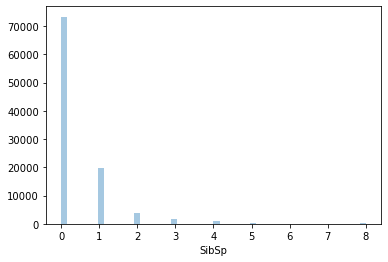

In [106]:
# Histogram 
sns.distplot(a=train_data['SibSp'], kde=False)

Conclusion: Variable SibSp  is a categorical numerical variable which can take seven values. We set to 0 all NaN so it may be that 0 was previously NaN and presented the most int he dataset. 

In [107]:
print("Variable Parch description: values type")
print(train_data['Parch'].dtype.name)
print("Variable Parch description: the number of unique values")
train_data['Parch'].nunique()

Variable Parch description: values type
int64
Variable Parch description: the number of unique values


8

<AxesSubplot:xlabel='Parch'>

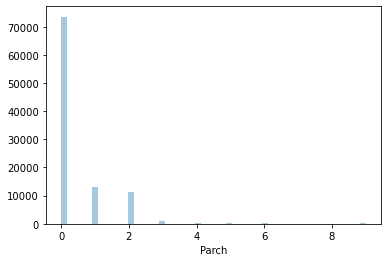

In [108]:
# Histogram 
sns.distplot(a=train_data['Parch'], kde=False)

Conclusion: Variable Parch is a categorical numerical variable which can take eight values.

In [109]:
print("Variable Ticket description: values type")
print(train_data['Ticket'].dtype.name)
print("Variable Ticket description: the number of unique values")
train_data['Ticket'].nunique()

Variable Ticket description: values type
object
Variable Ticket description: the number of unique values


75331

Conclusion: Variable Ticket is not categorical variable of type object (most probably a string).

In [110]:
print("Variable Fare description: values type")
print(train_data['Fare'].dtype.name)
print("Variable Fare description: the number of unique values")
train_data['Fare'].nunique()

Variable Fare description: values type
float64
Variable Fare description: the number of unique values


15935

<AxesSubplot:xlabel='Fare'>

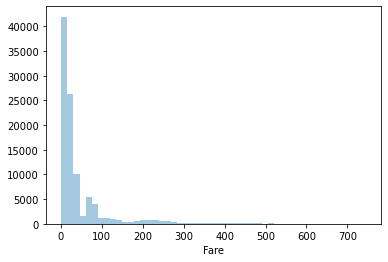

In [111]:
# Histogram 
sns.distplot(a=train_data['Fare'], kde=False)

Conclusion: Variable Fare is not categorical numerical variable. There are more cheap tickets rather then expensive in this dataset.

In [112]:
print("Variable Cabin description: values type")
print(train_data['Cabin'].dtype.name)
print("Variable Cabin description: the number of unique values")
train_data['Cabin'].nunique()

Variable Cabin description: values type
object
Variable Cabin description: the number of unique values


26992

Conclusion: Variable Cabin is not categorical variable of type object (most probably a string).

In [113]:
print("Variable Embarked description: values type")
print(train_data['Embarked'].dtype.name)
print("Variable Embarked description: the number of unique values")
train_data['Embarked'].nunique() 

Variable Embarked description: values type
object
Variable Embarked description: the number of unique values


3

Conclusion: Variable Embarked is a categorical variable of type object (most probably a string) which takes three values.

Section 02. Exploring the relationship between each variable and the target

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

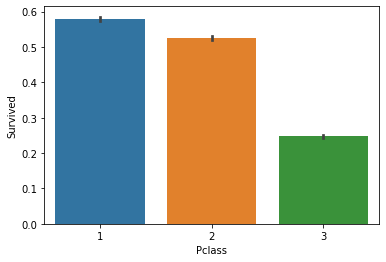

In [114]:
# Bar chart 
sns.barplot(x=train_data['Pclass'], y=train_data['Survived'])

Conclusion: There are less survived in the Pcalss == 3 

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

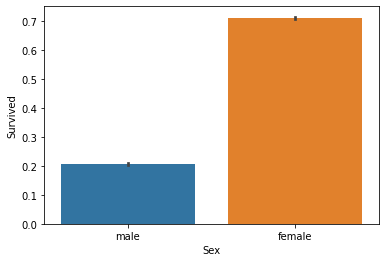

In [115]:
# Bar chart 
sns.barplot(x=train_data['Sex'], y=train_data['Survived'])

Conclusion: More female survived.

<AxesSubplot:xlabel='Age', ylabel='Survived'>

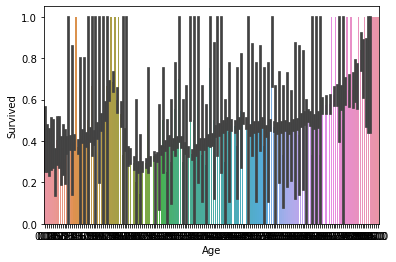

In [116]:
# Bar chart 
sns.barplot(x=train_data['Age'], y=train_data['Survived'])

Conclusion: Most probably there is no obvious dependancy between Age and Survived ot it is not detected via barplot.

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

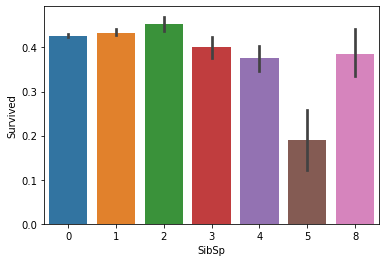

In [117]:
# Bar chart 
sns.barplot(x=train_data['SibSp'], y=train_data['Survived'])

Conclusion: less survived are in SibSp == 5

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

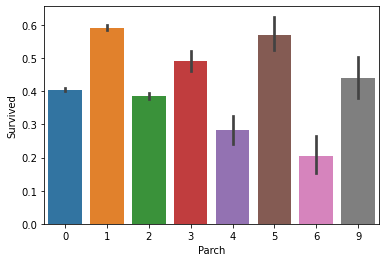

In [118]:
# Bar chart 
sns.barplot(x=train_data['Parch'], y=train_data['Survived'])

Conclusion: difficult to make obvious conlcusion between Parch and Survived from the graph above.

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

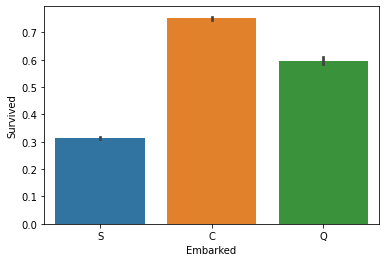

In [119]:
# Bar chart 
sns.barplot(x=train_data['Embarked'], y=train_data['Survived'])

Conclusion: Considerable less Survived are in Embarked == S